<a href="https://colab.research.google.com/github/bargida/AI_codes/blob/main/AmesHousing_Regression_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ames Housing Regression Task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error as mae,mean_squared_error as mse,mean_absolute_error as mae,root_mean_squared_error as rmse
import os

In [2]:
dataset = pd.read_csv("AmesHousing.csv")

In [3]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
dataset.shape

(2930, 82)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
dataset.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
dataset.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [8]:
bmean = dataset['Lot Frontage'].mean()
dataset['Lot Frontage'].fillna(bmean, inplace=True)

In [9]:
dataset.isna().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [10]:
labelEncoder = LabelEncoder()

In [11]:
dataset["SalePrice"] = labelEncoder.fit_transform(dataset["SalePrice"])

In [12]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,634
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,138
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,450
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,723
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,537


<Axes: >

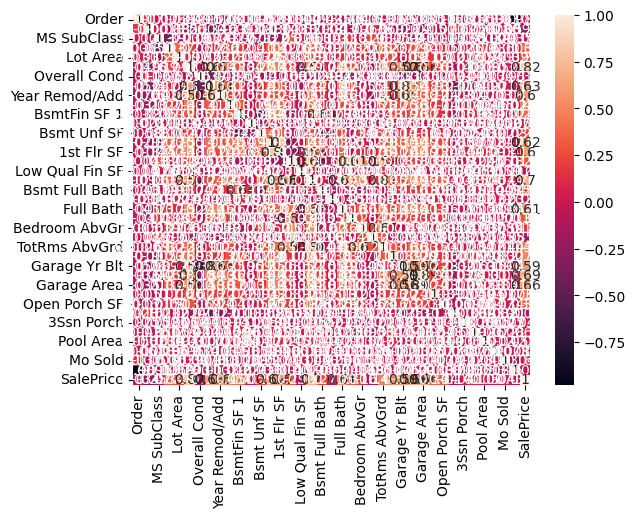

In [13]:
sns.heatmap(dataset.select_dtypes(include=np.number).corr(),annot=True)

In [14]:
for col in dataset.select_dtypes(include=np.number).columns:
    sc = StandardScaler()
    dataset[col] = sc.fit_transform(dataset[[col]])

In [15]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.731460,-0.997164,-0.877005,RL,3.366911,2.744381,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.448057,1.678499,WD,Normal,0.761557
1,-1.730277,-0.996904,-0.877005,RH,0.505463,0.187097,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,MnPrv,NaN,-0.089422,-0.079602,1.678499,WD,Normal,-1.207192
2,-1.729095,-0.996899,-0.877005,RL,0.552372,0.522814,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,NaN,Gar2,21.985725,-0.079602,1.678499,WD,Normal,0.031215
3,-1.727913,-0.996888,-0.877005,RL,1.115280,0.128458,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.816513,1.678499,WD,Normal,1.114820
4,-1.726731,-0.992903,0.061285,RL,0.224010,0.467348,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,MnPrv,NaN,-0.089422,-1.184969,1.678499,WD,Normal,0.376540


In [16]:
dataset.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,1.726731,1.106582,0.530430,RL,-1.511622,-0.280621,Pave,NaN,IR1,Lvl,...,-0.063031,NaN,GdPrv,NaN,-0.089422,-1.184969,-1.360118,WD,Normal,-0.540357
2926,1.727913,1.106588,-0.877005,RL,0.000000,-0.160296,Pave,NaN,IR1,Low,...,-0.063031,NaN,MnPrv,NaN,-0.089422,-0.079602,-1.360118,WD,Normal,-0.762635
2927,1.729095,1.107245,0.647716,RL,-0.338898,0.037199,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,MnPrv,Shed,1.146786,0.288854,-1.360118,WD,Normal,-0.738820
2928,1.730277,1.110954,-0.877005,RL,0.364736,-0.017506,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,-0.816513,-1.360118,WD,Normal,0.003430
2929,1.731460,1.111225,0.061285,RL,0.224010,-0.066118,Pave,NaN,Reg,Lvl,...,-0.063031,NaN,NaN,NaN,-0.089422,1.762678,-1.360118,WD,Normal,0.352724


In [17]:
missing_threshold = 0.5
missing_percentage = dataset.isnull().sum() / len(dataset)

In [18]:
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
cleaned_data = dataset.drop(columns=columns_to_drop)

In [19]:
numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data[numerical_cols] = cleaned_data[numerical_cols].fillna(cleaned_data[numerical_cols].median())

In [20]:
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].fillna(cleaned_data[categorical_cols].mode().iloc[0])

In [21]:
cleaned_data.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [22]:
regression_target = 'SalePrice'
selected_features = ['Gr Liv Area', 'Overall Qual', 'Year Built', 'Garage Cars']

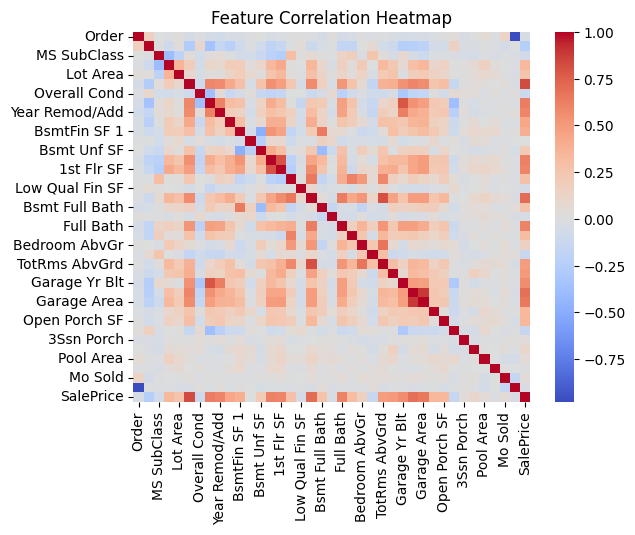

In [23]:
correlation = cleaned_data.corr(numeric_only=True)
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
x_reg = cleaned_data[selected_features]
y_reg = cleaned_data[regression_target]

In [25]:
scaler = StandardScaler()
x_reg_scaled = scaler.fit_transform(x_reg)

In [26]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_scaled, y_reg, test_size=0.2, random_state=67)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(x_test_reg)

In [28]:
print("Linear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_lr))
print("R^2 Score:", r2_score(y_test_reg, y_pred_lr))

Linear Regression Evaluation:
Mean Squared Error: 0.1829577919779221
R^2 Score: 0.8252316349100427


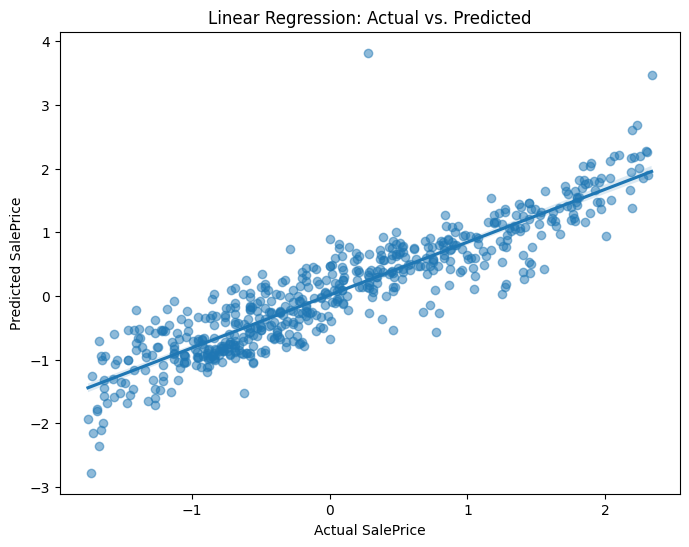

In [29]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_reg, y=y_pred_lr, scatter_kws={'alpha':0.5})
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=67)
rf_model.fit(x_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(x_test_reg)
print("\nRandom Forest Regressor Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_rf))
print("R^2 Score:", r2_score(y_test_reg, y_pred_rf))


Random Forest Regressor Evaluation:
Mean Squared Error: 0.15808691766311955
R^2 Score: 0.8489892567930197


In [31]:
from sklearn.neural_network import MLPRegressor
nn_model_1 = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=67)

In [32]:
nn_model_1.fit(x_train_reg, y_train_reg)
y_pred_nn_1 = nn_model_1.predict(x_test_reg)

In [33]:
print("Neural Network Regressor 1 Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_nn_1))
print("R^2 Score:", r2_score(y_test_reg, y_pred_nn_1))

Neural Network Regressor 1 Evaluation:
Mean Squared Error: 0.147278407891396
R^2 Score: 0.8593139637182701


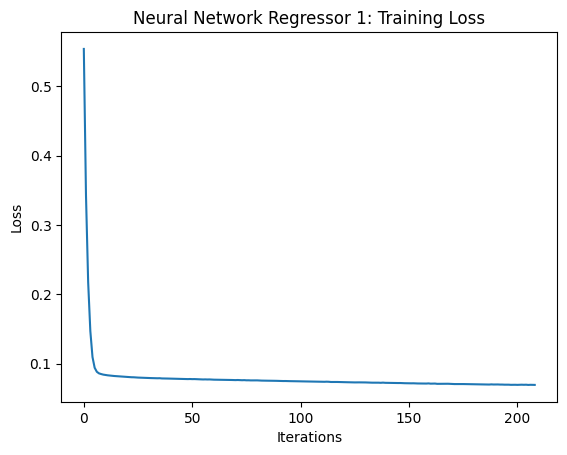

In [34]:
plt.plot(nn_model_1.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Neural Network Regressor 1: Training Loss")
plt.show()

In [35]:
nn_model_2 = MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=67)

In [36]:
nn_model_2.fit(x_train_reg, y_train_reg)
y_pred_nn_2 = nn_model_2.predict(x_test_reg)

In [37]:
print("\nNeural Network Regressor 1 Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_nn_2))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_reg, y_pred_nn_2)))
print("Mean Absolute Error:", mae(y_test_reg, y_pred_nn_2))
print("R^2 Score:", r2_score(y_test_reg, y_pred_nn_2))


Neural Network Regressor 1 Evaluation:
Mean Squared Error: 0.15186836562670253
Root Mean Squared Error: 0.3897029197051294
Mean Absolute Error: 0.29361568715346614
R^2 Score: 0.8549294584148374
